# Loading & Splitting the wine dataset

In [54]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=2606)

print(X_train.shape, X_test.shape)

(133, 13) (45, 13)


# Generalization accuracy of SVM

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svm = SVC()

In [56]:
import numpy as np
scores = cross_val_score(svm, X_train, y_train)
mean=np.mean(scores)
print(mean)

0.3832902670111973


C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

Generalization accuracy of SVM using default parameters is 0.38

In [57]:
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6

In [58]:
test_error_rate = 1-(svm.score(X_test, y_test))
print(test_error_rate)

0.4


Test error rate of SVM using default parameters is 0.40

In my opinion the accuracy which we have here is bit low and cross validation is underestimating the accuracy

# Creating pipeline for SVM 

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [60]:
# Standard scaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
standard_pipe = make_pipeline(StandardScaler(), SVC())
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100], 
              'svc__gamma': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(standard_pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print('Best accuracy:',grid.best_score_)
print('Test score',grid.score(X_test, y_test))
print('Best Parameters:',grid.best_params_)

Best accuracy: 0.9849624060150376
Test score 1.0
Best Parameters: {'svc__C': 1, 'svc__gamma': 0.1}


C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [61]:
# MinMax scaler

from sklearn.preprocessing import MinMaxScaler
minmax_pipe = make_pipeline(MinMaxScaler(), SVC())
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100], 
              'svc__gamma': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(minmax_pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print('Best accuracy:',grid.best_score_)
print('Test score',grid.score(X_test, y_test))
print('Best Parameters:',grid.best_params_)

Best accuracy: 0.9924812030075187
Test score 1.0
Best Parameters: {'svc__C': 1, 'svc__gamma': 1}


C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [62]:
# Robust scaler

from sklearn.preprocessing import RobustScaler
robust_pipe = make_pipeline(RobustScaler(), SVC())
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100], 
              'svc__gamma': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(robust_pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print('Best accuracy:',grid.best_score_)
print('Test score',grid.score(X_test, y_test))
print('Best Parameters:',grid.best_params_)

Best accuracy: 0.9924812030075187
Test score 0.9777777777777777
Best Parameters: {'svc__C': 10, 'svc__gamma': 0.01}


C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [63]:
# Normalizer scaler

from sklearn.preprocessing import Normalizer
normalize_pipe = make_pipeline(Normalizer(), SVC())
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100], 
              'svc__gamma': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(normalize_pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print('Best accuracy:',grid.best_score_)
print('Test score',grid.score(X_test, y_test))
print('Best Parameters:',grid.best_params_)

Best accuracy: 0.9473684210526315
Test score 0.9555555555555556
Best Parameters: {'svc__C': 100, 'svc__gamma': 100}


C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


As per the above numerical results we can say that for wine dataset standard scaler & min max scaler are the best since we have got the test score as 1. Robust scaler is also good with 0.98 accuracy where as Normalizer is the worst performing as compared to others with the average result of 0.95

# Cross Conformal Predictors

Defining KFold as 5

In [64]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=2606, n_splits=5)

Defining elements for p-values

In [65]:
train_size = X_train.shape[0]
test_size = X_test.shape[0]
classes = 3
p = np.zeros(shape=(test_size,classes))
ranks = np.zeros(shape=(test_size,classes))

Computing p-values

In [66]:
for rest_index, fold_index in kf.split(X_train):
    X_rest, X_fold = X_train[rest_index], X_train[fold_index]
    y_rest, y_fold = y_train[rest_index], y_train[fold_index]
    grid.fit(X_rest, y_rest)
    df_fold = grid.decision_function(X_fold)
    df_test = grid.decision_function(X_test)
    n_fold = X_fold.shape[0]   # size of the current fold
    alpha_fold = np.zeros(n_fold)  # initializing the conformity scores for the fold
    for i in range(n_fold):
        alpha_fold[i] = df_fold[i,y_fold[i]]  # conformity score of the ith element of the fold
    for j in range(test_size):
        for l in range(classes):
            ranks[j,l] = ranks[j,l] + np.sum(alpha_fold <= df_test[j,l])
# p-values:
p = (ranks+1) / (train_size+1)

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

Let's plot the calibration curve

Text(0, 0.5, 'errors')

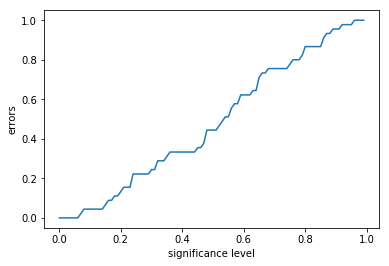

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
eps = np.zeros(100) 
error = np.zeros(100) 
for k in range(100):
    eps[k] = k/100 
    error[k] = 0 
    for j in range(test_size):
        if (p[j,y_test[j]] <= eps[k]): 
            error[k] = error[k] + 1 
    error[k] = error[k] / test_size 
plt.plot(eps, error)
plt.xlabel("significance level")
plt.ylabel("errors")

Calculating average false p-value

In [69]:
p_values = 0
for j in range(test_size):
    p_values = p_values + p[j,0] + p[j,1] + p[j,2] - p[j,y_test[j]]
print(p_values / (test_size*2))

0.02106135986733001


# Loading and Splitting USPS Dataset

In [70]:
train_data = np.genfromtxt("zip.train.gz", usecols=np.arange(1,257), dtype='float')
test_data = np.genfromtxt("zip.test.gz", usecols=np.arange(1,257), dtype='float')
train_target = np.genfromtxt("zip.train.gz", usecols=0, dtype='int')
test_target = np.genfromtxt("zip.test.gz", usecols=0, dtype='int')

In [71]:
data = np.row_stack((train_data, test_data))
target = np.append(train_target, test_target)

In [72]:
print(data.shape,target.shape)

(9298, 256) (9298,)


In [73]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, target, random_state=2606)
print(X_train1.shape, X_test1.shape)

(6973, 256) (2325, 256)


# Generalization accuracy of SVM

In [74]:
scores = cross_val_score(svm, X_train1, y_train1)
mean=np.mean(scores)
print(mean)

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

0.9622848698399662


In [75]:
svm.fit(X_train1, y_train1)
svm.score(X_test1, y_test1)

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9720430107526882

In [76]:
test_error_rate = 1-(svm.score(X_test1, y_test1))
print(test_error_rate)

0.027956989247311825


Generalization accuracy of SVM using default parameters is 0.96 <br>
Test error rate of SVM using default parameters is 0.028

The accuracy we have here is pretty good

# Creating pipeline for SVM 

In [30]:
# Standard scaler

standard_pipe1 = make_pipeline(StandardScaler(), SVC())
param_grid = {'svc__C': [0.01, 0.01, 1, 10], 
              'svc__gamma': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(standard_pipe1, param_grid=param_grid)
grid.fit(X_train1, y_train1)

print('Best accuracy:',grid.best_score_)
print('Test score',grid.score(X_test1, y_test1))
print('Best Parameters:',grid.best_params_)

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best accuracy: 0.9264305177111717
Test score 0.9449462365591398
Best Parameters: {'svc__C': 10, 'svc__gamma': 0.01}


In [31]:
# MinMax scaler

minmax_pipe1 = make_pipeline(MinMaxScaler(), SVC())
param_grid = {'svc__C': [0.01, 0.01, 1, 10], 
              'svc__gamma': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(minmax_pipe1, param_grid=param_grid)
grid.fit(X_train1, y_train1)

print('Best accuracy:',grid.best_score_)
print('Test score',grid.score(X_test1, y_test1))
print('Best Parameters:',grid.best_params_)

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best accuracy: 0.9655815287537646
Test score 0.9763440860215054
Best Parameters: {'svc__C': 10, 'svc__gamma': 0.01}


In [32]:
# Robust scaler

robust_pipe1 = make_pipeline(RobustScaler(), SVC())
param_grid = {'svc__C': [0.01, 0.01, 1, 10], 
              'svc__gamma': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(robust_pipe1, param_grid=param_grid)
grid.fit(X_train1, y_train1)

print('Best accuracy:',grid.best_score_)
print('Test score',grid.score(X_test1, y_test1))
print('Best Parameters:',grid.best_params_)

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best accuracy: 0.7116018930159186
Test score 0.8210752688172043
Best Parameters: {'svc__C': 10, 'svc__gamma': 0.01}


In [33]:
# Normalizer scaler

normalize_pipe1 = make_pipeline(Normalizer(), SVC())
param_grid = {'svc__C': [0.01, 0.01, 1, 10], 
              'svc__gamma': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(normalize_pipe1, param_grid=param_grid)
grid.fit(X_train1, y_train1)

print('Best accuracy:',grid.best_score_)
print('Test score',grid.score(X_test1, y_test1))
print('Best Parameters:',grid.best_params_)

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best accuracy: 0.9718915818155743
Test score 0.9823655913978495
Best Parameters: {'svc__C': 10, 'svc__gamma': 1}


As per the above numerical data we can say that for wine dataset standard scaler & min max scaler are the best since we have got the test score as 1. Robust scaler is also good with 0.98 accuracy where as Normalizer is the worst performing as compared to others with the average result of 0.95

# Cross Conformal Predictors

Elements for p-values

In [39]:
train_size1 = X_train1.shape[0]
test_size1 = X_test1.shape[0]
classes1 = 10
p1 = np.zeros(shape=(test_size1,classes1))
ranks1 = np.zeros(
    shape=(test_size1,classes1))

computing p-values

In [40]:
for rest_index1, fold_index1 in kf.split(X_train1):
    X_rest1, X_fold1 = X_train1[rest_index1], X_train1[fold_index1]
    y_rest1, y_fold1 = y_train1[rest_index1], y_train1[fold_index1]
    grid.fit(X_rest1, y_rest1)
    df_fold1 = grid.decision_function(X_fold1)
    df_test1 = grid.decision_function(X_test1)
    n_fold1 = X_fold1.shape[0]   # size of the current fold
    alpha_fold1 = np.zeros(n_fold1)  # initializing the conformity scores for the fold
    for i in range(n_fold1):
        alpha_fold1[i] = df_fold1[i,y_fold1[i]]  # conformity score of the ith element of the fold
    for j in range(test_size1):
        for l in range(classes1):
            ranks1[j,l] = ranks1[j,l] + np.sum(alpha_fold1 <= df_test1[j,l])
#p-values:
p1 = (ranks1+1) / (train_size1+1)

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

2647.110955476761 seconds


Let's plot the calibration curve

Text(0, 0.5, 'errors')

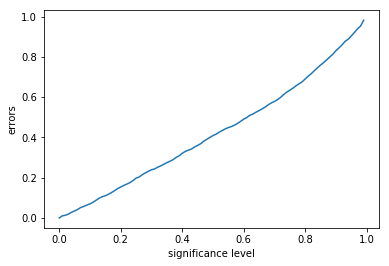

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
eps1 = np.zeros(100) 
error1 = np.zeros(100) 
for k in range(100):
    eps1[k] = k/100 
    error1[k] = 0 
    for j in range(test_size1):
        if (p1[j,y_test1[j]] <= eps1[k]): 
            error1[k] = error1[k] + 1 
    error1[k] = error1[k] / test_size1 
plt.plot(eps1, error1)
plt.xlabel("significance level")
plt.ylabel("errors")

Calculating average false p-value

In [79]:
p_values1 = 0
for j in range(test_size1):
    p_values1 = p_values1 + p1[j,0] + p1[j,1] + p1[j,2] + p1[j,3] + p1[j,4] + p1[j,5] + p1[j,6] + p1[j,7] + p1[j,8] + p1[j,9]  - p1[j,y_test1[j]]
print(p_values1 / (test_size1*9))

0.004385354854470922


# Results

<u>Generalization accuracy of SVM with deafult parameters:</u><br>
<br>
For wine dataset: 0.60 <br>
For USPS dataset: 0.97 <br>
<br>

<u>Test error rate for SVM with default parameters:</u><br>
<br>
For wine dataset: 0.40<br>
For USPS dataset: 0.03<br>
<br>

<u>Test error rate of GridSearchCV for different ways of normalization:</u><br>
<br>
For wine dataset:<br>
StandardScaler - 0.00<br>
MinMaxScaler - 0.00<br>
RobustScaler - 0.03<br>
Normalizer - 0.05<br>
<br>
For USPS dataset:<br>
StandardScaler - 0.06<br>
MinMaxScaler - 0.02<br>
RobustScaler - 0.18<br>
Normalizer - 0.02<br>
<br>

<u>Average false p-value:</u><br>
<br>
For wine dataset: 0.021<br>
For USPS dataset: 0.004<br>

<u>Calibration Curve for wine dataset

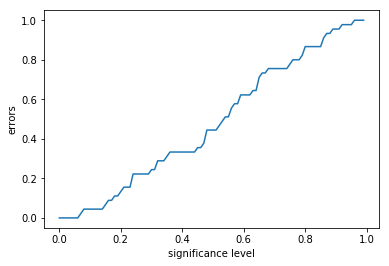

<u>Calibration Curve for USPS dataset

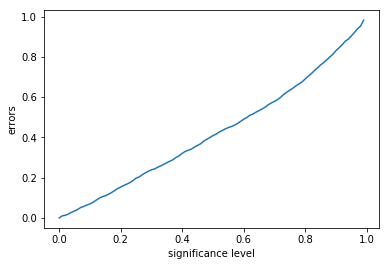